# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [2]:
# Load historical GDP data
#url_GDP = "https://github.com/udacity/CD13649-Project/blob/main/Project/GDP.csv"
#above url doesn't return a csv. Why?
url_GDP = 'https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/GDP.csv'
df_gdp = pd.read_csv(url_GDP, parse_dates=[0])
df_gdp = df_gdp.rename(columns={df_gdp.columns[0]: 'date', df_gdp.columns[1] : 'gdp'})
df_gdp.set_index('date', inplace=True)


In [3]:
# Check the first few rows of data
df_gdp.head()


,gdp
date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [4]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1947-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     309 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


No missing values in de gdp dataframe

In [5]:
df_gdp.describe()

,gdp
count,309.000000
mean,7227.754935
std,7478.297734
min,243.164000
25%,804.981000
50%,4386.773000
75%,12527.214000
max,28284.498000


In [6]:
df_gdp.index

DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01',
               ...
               '2021-10-01', '2022-01-01', '2022-04-01', '2022-07-01',
               '2022-10-01', '2023-01-01', '2023-04-01', '2023-07-01',
               '2023-10-01', '2024-01-01'],
              dtype='datetime64[ns]', name='date', length=309, freq=None)

In [7]:
# Load the historical stock price data for Apple and Microsoft
url_apple = "https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/apple_historical_data.csv"
url_msoft = "https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/microsoft_historical_data.csv"

df_apple = pd.read_csv(url_apple, parse_dates=[0])
df_msoft = pd.read_csv(url_msoft, parse_dates=[0])

In [8]:
# Check the first few rows of data
df_apple.columns = map(str.lower, df_apple.columns)
df_apple = df_apple.rename(columns={df_apple.columns[0] : 'date', df_apple.columns[1] : 'close'})
df_apple.set_index('date', inplace=True)
df_apple.head()

,close,volume,open,high,low
date,,,,,
2024-05-03,$183.38,163224100,$186.65,$187.00,$182.66
2024-05-02,$173.03,94214920,$172.51,$173.42,$170.89
2024-05-01,$169.30,50383150,$169.58,$172.71,$169.11
2024-04-30,$170.33,65934780,$173.33,$174.99,$170.00
2024-04-29,$173.50,68169420,$173.37,$176.03,$173.10


In [9]:
# Use methods like .info() and .describe() to explore the data
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2514 non-null   object
 1   volume  2517 non-null   int64 
 2   open    2517 non-null   object
 3   high    2517 non-null   object
 4   low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In df_apple 'Close' has 3 missing data

In [10]:
df_apple.describe()

,volume
count,2.517000e+03
mean,1.277394e+08
std,7.357405e+07
min,2.404834e+07
25%,7.741776e+07
50%,1.077601e+08
75%,1.567789e+08
max,7.576780e+08


In [11]:
df_msoft.columns = map(str.lower, df_msoft.columns)
df_msoft = df_msoft.rename(columns={df_msoft.columns[0] : 'date', df_msoft.columns[1] : 'close'})
df_msoft.set_index('date', inplace=True)
df_msoft.head()

,close,volume,open,high,low
date,,,,,
2024-05-03,$406.66,17446720,$402.28,$407.15,$401.86
2024-05-02,$397.84,17709360,$397.66,$399.93,$394.6515
2024-05-01,$394.94,23562480,$392.61,$401.7199,$390.31
2024-04-30,$389.33,28781370,$401.49,$402.16,$389.17
2024-04-29,$402.25,19582090,$405.25,$406.32,$399.19


In [12]:
# Use methods like .info() and .describe() to explore the data
df_msoft.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2517 non-null   object
 1   volume  2517 non-null   int64 
 2   open    2517 non-null   object
 3   high    2517 non-null   object
 4   low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In df_msoft there are no missing data

In [13]:
df_msoft.describe()

,volume
count,2.517000e+03
mean,2.953106e+07
std,1.370138e+07
min,7.425603e+06
25%,2.131892e+07
50%,2.639470e+07
75%,3.360003e+07
max,2.025141e+08


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [14]:
# Check for nulls 
df_apple.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2514 non-null   object
 1   volume  2517 non-null   int64 
 2   open    2517 non-null   object
 3   high    2517 non-null   object
 4   low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


In df_apple Column 'Close' has 3 missing data

In [15]:
# Forward fill any missing data
df_apple.ffill(inplace=True)

In [16]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   close   2517 non-null   object
 1   volume  2517 non-null   int64 
 2   open    2517 non-null   object
 3   high    2517 non-null   object
 4   low     2517 non-null   object
dtypes: int64(1), object(4)
memory usage: 118.0+ KB


## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [17]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col]=df[col].replace({'\$': ''}, regex=True).astype(float)

    

In [18]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
numeric_columns=['close', 'open', 'high', 'low']
convert_dollar_columns_to_numeric(df_apple, numeric_columns)
df_apple.head()

,close,volume,open,high,low
date,,,,,
2024-05-03,183.38,163224100,186.65,187.00,182.66
2024-05-02,173.03,94214920,172.51,173.42,170.89
2024-05-01,169.30,50383150,169.58,172.71,169.11
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-04-29,173.50,68169420,173.37,176.03,173.10


In [19]:
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
 1   volume  2517 non-null   int64  
 2   open    2517 non-null   float64
 3   high    2517 non-null   float64
 4   low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [20]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
numeric_columns=['close', 'open', 'high', 'low']
convert_dollar_columns_to_numeric(df_msoft, numeric_columns)
df_msoft.head()

,close,volume,open,high,low
date,,,,,
2024-05-03,406.66,17446720,402.28,407.1500,401.8600
2024-05-02,397.84,17709360,397.66,399.9300,394.6515
2024-05-01,394.94,23562480,392.61,401.7199,390.3100
2024-04-30,389.33,28781370,401.49,402.1600,389.1700
2024-04-29,402.25,19582090,405.25,406.3200,399.1900


In [21]:
# Use .info() and check the type of each column to ensure that the above steps worked
df_msoft.info()
df_msoft.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
 1   volume  2517 non-null   int64  
 2   open    2517 non-null   float64
 3   high    2517 non-null   float64
 4   low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


DatetimeIndex(['2024-05-03', '2024-05-02', '2024-05-01', '2024-04-30',
               '2024-04-29', '2024-04-26', '2024-04-25', '2024-04-24',
               '2024-04-23', '2024-04-22',
               ...
               '2014-05-19', '2014-05-16', '2014-05-15', '2014-05-14',
               '2014-05-13', '2014-05-12', '2014-05-09', '2014-05-08',
               '2014-05-07', '2014-05-06'],
              dtype='datetime64[ns]', name='date', length=2517, freq=None)

In [22]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format


In [23]:
# Use .info() and check the type of each column to ensure that the above steps worked
df_apple.info()
df_apple.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2024-05-03 to 2014-05-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   2517 non-null   float64
 1   volume  2517 non-null   int64  
 2   open    2517 non-null   float64
 3   high    2517 non-null   float64
 4   low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


DatetimeIndex(['2024-05-03', '2024-05-02', '2024-05-01', '2024-04-30',
               '2024-04-29', '2024-04-26', '2024-04-25', '2024-04-24',
               '2024-04-23', '2024-04-22',
               ...
               '2014-05-19', '2014-05-16', '2014-05-15', '2014-05-14',
               '2014-05-13', '2014-05-12', '2014-05-09', '2014-05-08',
               '2014-05-07', '2014-05-06'],
              dtype='datetime64[ns]', name='date', length=2517, freq=None)

## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [24]:
url_inflation = "https://raw.githubusercontent.com/udacity/CD13649-Project/main/Project/inflation_monthly.csv"
df_inflation = pd.read_csv(url_inflation,  parse_dates=[0])
df_inflation = df_inflation.rename(columns={df_inflation.columns[0]: 'date'})
df_inflation.set_index('date', inplace=True)

In [25]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 675 entries, 1968-01-01 to 2024-03-01
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [26]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
df_inflation.index=df_inflation.index + pd.offsets.MonthEnd(0) 
df_inflation.head()

,CORESTICKM159SFRBATL
date,
1968-01-31,3.651861
1968-02-29,3.673819
1968-03-31,4.142164
1968-04-30,4.155828
1968-05-31,4.088245


In [27]:
df_inflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 675 entries, 1968-01-31 to 2024-03-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CORESTICKM159SFRBATL  675 non-null    float64
dtypes: float64(1)
memory usage: 10.5 KB


In [28]:
# Upsample and interpolate from monthly to weekly 
df_inflation.index = pd.to_datetime(df_inflation.index)
df_inflation_weekly = df_inflation.resample('W').interpolate(method='linear')



In [29]:
# Downsample from monthly to quarterly 
df_inflation.index = pd.to_datetime(df_inflation.index)
df_inflation_quarterly = df_inflation.resample('Q').mean()


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [30]:
# Standardize the GDP measure
scaler = StandardScaler()
df_gdp_scaled = pd.DataFrame(scaler.fit_transform(df_gdp))


In [31]:
# Check the dataframe to make sure the calculation worked as expected 
df_gdp_scaled.describe()

,0
count,3.090000e+02
mean,-1.839593e-16
std,1.001622e+00
min,-9.354964e-01
25%,-8.602482e-01
50%,-3.805131e-01
75%,7.097946e-01
max,2.820281e+00


In [32]:
average_gdp= df_gdp.mean()
std_gdp = df_gdp.std()

In [33]:
df_gdp_scaled_manual = (df_gdp-average_gdp)/std_gdp


In [34]:
df_gdp_scaled_manual.describe()

,gdp
count,3.090000e+02
mean,-1.379695e-16
std,1.000000e+00
min,-9.339814e-01
25%,-8.588551e-01
50%,-3.798969e-01
75%,7.086451e-01
max,2.815713e+00


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [35]:
# Get max date in timeseries
max_date_apple =df_apple.index.max()
max_date_apple

Timestamp('2024-05-03 00:00:00')

In [36]:
# Use the max date calculated above to get the last three months of data in the dataset 
df_apple_lastQ = df_apple.loc[:max_date_apple -pd.to_timedelta('90day')]
df_apple_lastQ

,close,volume,open,high,low
date,,,,,
2024-05-03,183.38,163224100,186.65,187.00,182.66
2024-05-02,173.03,94214920,172.51,173.42,170.89
2024-05-01,169.30,50383150,169.58,172.71,169.11
2024-04-30,170.33,65934780,173.33,174.99,170.00
2024-04-29,173.50,68169420,173.37,176.03,173.10
...,...,...,...,...,...
2024-02-09,188.85,45155220,188.65,189.99,188.00
2024-02-08,188.32,40962050,189.39,189.54,187.35
2024-02-07,189.41,53438960,190.64,191.05,188.61


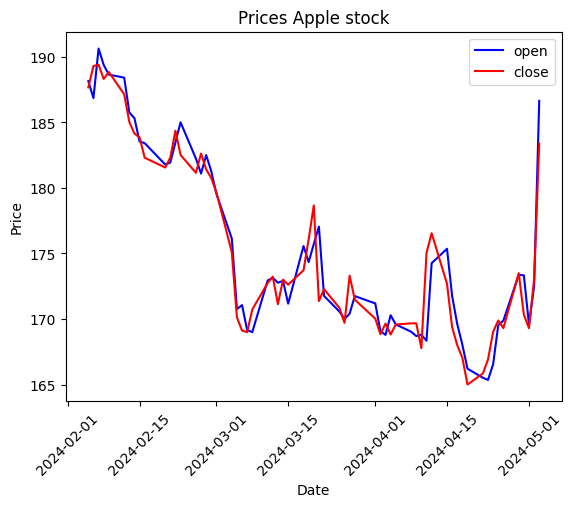

In [37]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
plt.plot(df_apple_lastQ['open'], label='open', color='blue')
plt.plot(df_apple_lastQ['close'], label='close', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prices Apple stock')
plt.legend()
plt.xticks(rotation = 45)
plt.show()


## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

Text(0.5, 1.0, 'Distribution Closing Price Apple')

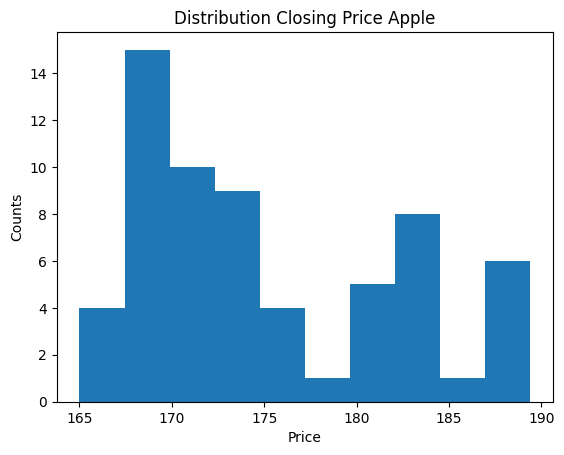

In [38]:
# Plot the histogram of Apple's closing price over the last 3 months 

plt.hist(df_apple_lastQ['close'])
plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Distribution Closing Price Apple')

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [39]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
df_apple_sorted = df_apple.sort_index()
df_daily_return_apple = df_apple_sorted['close'].pct_change()
df_daily_return_apple

date
2014-05-06         NaN
2014-05-07   -0.003768
2014-05-08   -0.007092
2014-05-09   -0.004286
2014-05-12    0.012434
                ...   
2024-04-29    0.024808
2024-04-30   -0.018271
2024-05-01   -0.006047
2024-05-02    0.022032
2024-05-03    0.059816
Name: close, Length: 2517, dtype: float64

In [40]:
df_msoft_sorted = df_msoft.sort_index()
df_daily_return_msoft = df_msoft_sorted['close'].pct_change()
df_daily_return_msoft

date
2014-05-06         NaN
2014-05-07    0.009345
2014-05-08    0.005453
2014-05-09   -0.002523
2014-05-12    0.010875
                ...   
2024-04-29   -0.010017
2024-04-30   -0.032119
2024-05-01    0.014409
2024-05-02    0.007343
2024-05-03    0.022170
Name: close, Length: 2517, dtype: float64

### 2. Interpolate stock returns from daily to monthly

In [41]:
df_montly_return_apple = df_apple_sorted.resample('M').last().pct_change()
df_montly_return_apple

,close,volume,open,high,low
date,,,,,
2014-05-31,NaN,NaN,NaN,NaN,NaN
2014-06-30,0.027421,-0.648770,0.010531,0.018253,0.024933
2014-07-31,0.028842,0.144544,0.054711,0.039693,0.035187
2014-08-31,0.072385,-0.213849,0.058872,0.056240,0.072178
2014-09-30,-0.017167,0.238203,-0.020218,-0.013214,-0.016438
...,...,...,...,...,...
2024-01-31,-0.042227,0.299860,-0.035379,-0.037551,-0.038492
2024-02-29,-0.019794,1.464179,-0.030849,-0.024212,-0.026146
2024-03-31,-0.051286,-0.519524,-0.052518,-0.056636,-0.050242


In [42]:
df_montly_return_msoft = df_msoft_sorted.resample('M').last().pct_change()
df_montly_return_msoft

,close,volume,open,high,low
date,,,,,
2014-05-31,NaN,NaN,NaN,NaN,NaN
2014-06-30,0.018564,-0.109190,0.042522,0.030266,0.036025
2014-07-31,0.035012,0.023948,0.028693,0.035063,0.033094
2014-08-31,0.052595,-0.315587,0.039419,0.040055,0.041202
2014-09-30,0.020471,0.529192,0.028388,0.022806,0.025750
...,...,...,...,...,...
2024-01-31,0.057281,1.555737,0.082340,0.101177,0.063538
2024-02-29,0.040394,-0.332640,0.004128,-0.002697,0.021928
2024-03-31,0.017116,-0.315398,0.030149,0.018518,0.032519


### 3. Merge the dataframes and calculate / plot the correlation

In [43]:
df_merged = pd.merge(pd.merge(df_montly_return_apple['close'], df_montly_return_msoft['close'], on='date', suffixes=['_apple', '_msoft']), df_inflation, on='date', how='left') 
df_merged

,close_apple,close_msoft,CORESTICKM159SFRBATL
date,,,
2014-05-31,NaN,NaN,2.127518
2014-06-30,0.027421,0.018564,2.142724
2014-07-31,0.028842,0.035012,2.098319
2014-08-31,0.072385,0.052595,1.959017
2014-09-30,-0.017167,0.020471,1.950170
...,...,...,...
2024-01-31,-0.042227,0.057281,4.603922
2024-02-29,-0.019794,0.040394,4.403102
2024-03-31,-0.051286,0.017116,4.509212


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [44]:
# Calculate correlation matrix
corr_matrix = df_merged.corr()

### 5. Plot the correlation matrix as a heatmap 

<Axes: >

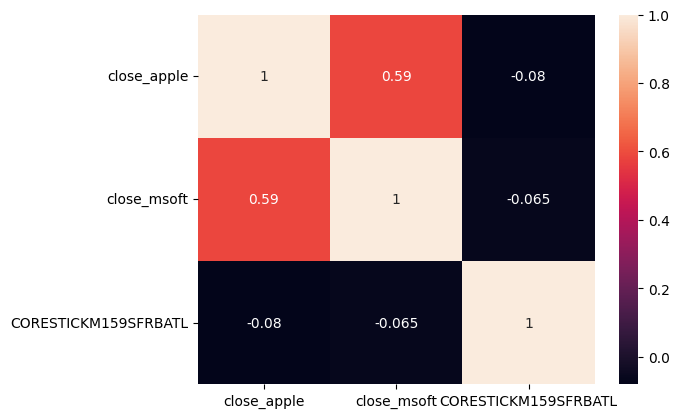

In [45]:
# Plot heatmap
sns.heatmap(corr_matrix, annot=True)

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [46]:
# Define the window size for the rolling calculation (e.g., one week)
window_size=7

In [47]:
# Calculate rolling one-week volatility
rolling_week_volatility_apple = df_apple_sorted['close'].rolling(window_size).std()# Calculate rolling one-week volatility

rolling_week_volatility_apple = rolling_week_volatility_apple.loc[(max_date_apple - pd.to_timedelta('90day')):]
rolling_week_volatility_apple

date
2024-02-05    2.792845
2024-02-06    2.378192
2024-02-07    1.817624
2024-02-08    1.837976
2024-02-09    1.323952
                ...   
2024-04-29    2.878881
2024-04-30    2.478049
2024-05-01    1.978168
2024-05-02    1.860294
2024-05-03    5.023946
Name: close, Length: 63, dtype: float64

Text(0, 0.5, 'Weekly rolling st. dev. Apple')

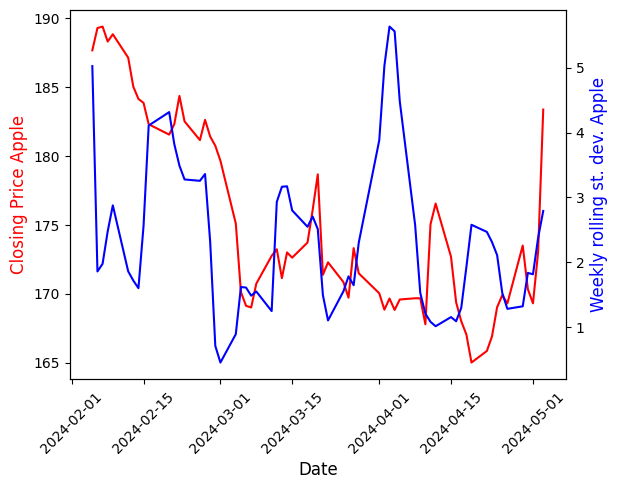

In [48]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
closing_price='red'
standard_dev='blue'

fig, ax =plt.subplots()


ax.plot(df_apple_lastQ.index, df_apple_lastQ['close'], color=closing_price)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price Apple', fontsize=12, color= closing_price)
plt.xticks(rotation=45)
ax2 = ax.twinx()
ax2.plot(df_apple_lastQ.index, rolling_week_volatility_apple, color=standard_dev)
ax2.set_ylabel('Weekly rolling st. dev. Apple', fontsize=12, color=standard_dev)


## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [49]:
modified_dfs={'data_gdp': df_gdp, 'data_inflation': df_inflation, 'data_apple' : df_apple, 'data_msoft': \
              df_msoft, 'df_inflation_weekly': df_inflation_weekly, 'df_inflation_quarterly': df_inflation_quarterly, \
            'df_gdp_scaled':  df_gdp_scaled,  'df_apple_lastQ': df_apple_lastQ, 'df_daily_return_apple' : df_daily_return_apple, \
             'df_daily_return_msoft': df_daily_return_msoft, 'df_montly_return_apple': df_montly_return_apple, \
             'df_montly_return_msoft': df_montly_return_msoft, 'df_merged': df_merged, 'rolling_week_volatility_apple': rolling_week_volatility_apple} 
for k,v in modified_dfs.items():
    v.to_csv(f'{k}.csv', index=False)

NB: Consumer price index (consumer_price_index.csv) is not exported because not used.